In [20]:
import geopandas
import pandas as pd
import numpy as np
from numpy.dual import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import patheffects
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader


<Figure size 720x576 with 0 Axes>

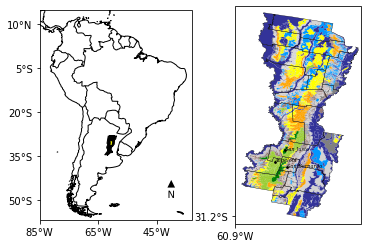

In [35]:
fname = 'mapas/provincias/provincias_geografica.shp'
fname2 = 'mapas/departamentos/departamentos.shp'
fname3 = 'Codgeo_Santa_Fe_con_datos/Santa_Fe_con_datos.shp'
fname4 = 'suelos_santa_fe_50k/suelos_santa_fe.shp'
fname5 = 'distritos-mapa.geojson'
fname6 = 'distritos.csv'


df = geopandas.read_file(fname)
df2 = geopandas.read_file(fname2)
df3 = geopandas.read_file(fname3)
df4 = geopandas.read_file(fname4)
df5 = geopandas.read_file(fname5)
df6 = pd.read_csv(fname6)

poly = df.loc[df['PROVINCIA']=='SANTA FE']['geometry'].values[0]
poly2 = df2.loc[df2['PROVINCIA']=='SANTA FE']
poly2 = poly2.loc[df2['DEPARTAMEN']=='SAN JUSTO']['geometry'].values[0]
depto = df5.loc[df5['nombre_departamento']=='San Justo']
df4 = df4.to_crs('epsg:4326')
res_intersection = geopandas.overlay(depto, df4, how='intersection')

plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1,2,subplot_kw=dict(projection=ccrs.PlateCarree()))
#ax = plt.axes(projection=ccrs.Mercator())
resol = '50m'
ax[0].coastlines(resolution=resol)
ax[0].add_feature(cfeature.BORDERS,edgecolor='black')
lat1, lon1, lat2, lon2 = -57, -85, 15, -33
ax[0].set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

ax[0].add_geometries([poly], crs=ccrs.PlateCarree(), facecolor='black', 
                  edgecolor='black')

ax[0].add_geometries([poly2], crs=ccrs.PlateCarree(), facecolor='yellow', 
                  edgecolor='none')
# Define the xticks for longitude
ax[0].set_xticks(np.arange(-85, -25, 20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax[0].xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax[0].set_yticks(np.arange(-50, 20, 15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax[0].yaxis.set_major_formatter(lat_formatter)

#compass
buffer = [patheffects.withStroke(linewidth=5, foreground="w")]
t1 = ax[0].text(-40, -50, u'\u25B2\nN', transform=ccrs.PlateCarree(),
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)

lat1, lon1, lat2, lon2 = -31.25, -60.9, -29.87, -60.1
ax[1].set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
#colores = ['gold', 'seagreen', 'goldenrod', 'seagreen', 'purple', 'royalblue', 'blue']
#colores = plt.get_cmap('terrain')
color = ['grey', 'lightgray', cm.terrain(norm(1.5/10)), cm.terrain(norm(9/10)),
         cm.terrain(norm(8/10)), 'yellow', 'orange', 'yellowgreen', 'green', cm.terrain(norm(4/10))]
for j in range(10): 
    #suelo = df4[df4.tipo == tipos[j]]
    suelo = res_intersection[np.logical_and(res_intersection['iat'] >=j * 10, res_intersection['iat'] < j * 10 + 10)]
    ax[1].add_geometries(suelo.geometry, crs=ccrs.PlateCarree(), linewidth=0.50, facecolor=color[j], edgecolor='none')
suelo = res_intersection[np.isnan(res_intersection['iat'])]
ax[1].add_geometries(suelo.geometry, crs=ccrs.PlateCarree(), linewidth=0.50, facecolor=cm.terrain(norm(0/10)), edgecolor='none')

ax[1].add_geometries(depto.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=0.3)

lat_sj = [-30.783333, -30.855, -30.8911]
lon_sj = [-60.583333,  -60.6489, -60.5719]
name_sj = ['San Justo', 'Angeloni', 'San Bernardo']
for i in range(3):
    ax[1].plot(lon_sj[i], lat_sj[i], marker='o', color='black', markersize=1.7, transform=ccrs.PlateCarree())
    ax[1].text(lon_sj[i], lat_sj[i], name_sj[i], color='black', fontsize=5, family='serif', style='oblique',
               transform=ccrs.PlateCarree())

# Define the xticks for longitude
ax[1].set_xticks(np.arange(-60.9, -60.1, 1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax[1].xaxis.set_major_formatter(lon_formatter)

ax[1].add_geometries([poly], crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='black', linewidth=0.3)

# Define the yticks for latitude
ax[1].set_yticks(np.arange(-31.2, -29.9, 2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax[1].yaxis.set_major_formatter(lat_formatter)


plt.savefig('mapa_ejemplo.jpg',dpi=300)
plt.show()

NameError: name 'poly3' is not defined

<Figure size 720x576 with 0 Axes>

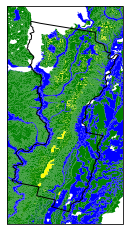

In [52]:
fname = 'suelos_santa_fe_50k/suelos_santa_fe.shp'
#fname2 = 'mapas/departamentos/departamentos.shp'
#fname3 = 'Codgeo_Santa_Fe_con_datos/Santa_Fe_con_datos.shp'
df = geopandas.read_file(fname)
#df2 = geopandas.read_file(fname2)
#df3 = geopandas.read_file(fname3)
poly = df.loc[:, 'geometry'].values[0]
#poly2 = df2.loc[df2['PROVINCIA']=='SANTA FE']
#poly2 = poly2.loc[df2['DEPARTAMEN']=='SAN JUSTO']['geometry'].values[0]
#poly3 = df3.loc[:, 'geometry'].values[0]
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=ccrs.PlateCarree()))
#ax = plt.axes(projection=ccrs.Mercator())
resol = '50m'
ax.coastlines(resolution=resol)
#ax[0].add_feature(cfeature.BORDERS,edgecolor='black')

lat1, lon1, lat2, lon2 = -31.3, -60.9, -29.8, -60.1
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())

#ax.add_geometries([poly], crs=ccrs.PlateCarree(), facecolor='none', 
#                  edgecolor='black')
colores = ['green', 'green', 'yellow', 'green', 'purple', 'blue', 'green']
tipos = pd.unique(df.loc[:, 'tipo'])
suelo = Reader(fname)
suelos = suelo.records()
for j in range(7):
    park = df[df.tipo == tipos[j]]
    ax.add_geometries(park.geometry, crs=ccrs.PlateCarree(), linewidth=0.50, facecolor=colores[j], edgecolor='none')
ax.add_geometries([poly2], crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='black')
shape_feature = ShapelyFeature(Reader(fname3).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
ax.add_feature(shape_feature)

ax.add_geometries([poly3], crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='black')            
        
#    #shape_feature = ShapelyFeature(Reader(fname).geometries(),
#    #                               ccrs.PlateCarree(), facecolor=colores[i])
#roads_feature = Reader(roads)
#parts = roads_feature.records()
#for part in parts:
#    if part.attributes['FULLNAME'] == 'US Hwy 202':
#        ax.add_geometries(part.attributes, linewidth=0.50, crs=ccrs.PlateCarree(),
#                          facecolor='none', edgecolor='gray')
    

#provinces_records = list(shpreader.Reader(shpname).records())
#    provinces_geometrys = [x.geometry for x in provinces_records]
#    provinces_attributes = [x.attributes for x in provinces_records]
#    return provinces_geometrys, provinces_attributes 
#ax.add_feature(shape_feature)
#ax[0].add_geometries([poly2], crs=ccrs.PlateCarree(), facecolor='white', 
#                  edgecolor='none')

lat1, lon1, lat2, lon2 = -31.3, -60.9, -29.8, -60.1
#ax[1].set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
#ax[1].add_feature(cfeature.BORDERS,edgecolor='black')

#ax[1].add_geometries([poly2], crs=ccrs.PlateCarree(), facecolor='none', 
#                  edgecolor='black')
shape_feature = ShapelyFeature(Reader(fname3).geometries(),
                                ccrs.PlateCarree(), facecolor='none')
#ax[1].add_feature(shape_feature)

#ax[1].add_geometries([poly3], crs=ccrs.PlateCarree(), facecolor='none', 
#                  edgecolor='black')

plt.savefig('mapa_ejemplo2.jpg')
plt.show()




In [ ]:
Significado de los campos de la tabla:

DEPARTAMEN= Departamentos

EN10ZONAS= Zonas agropecuarias

HECTAREAS= Superficie en Has

El código que caracteriza a cada zona ha de entenderse del siguiente modo:

"N° de Zona_Región a la que pertenece_ Actividades agropecuarias dominantes" (ejemplo: "05_GG_T o Ti", que significa: Zona 05 , Región Ganadera, con Tambos puros o Tambos con algo de invernada)

Donde: A= Agricultura, T= Tambo, I= Invernada, C= Cría; las mayúsculas/minúsculas y el orden de izquierda a derecha también son significativos para la caracterización. 
    
    Glosario de símbolos
	
	 
As 	Asociación
cc 	Concepto central
Cp 	Complejo
Cs 	Consociación
Af 	Alfisol (serie sin diferenciar)
Abcf-t 	Albacualf típico (serie sin diferenciar)
Nft 	Natracualf típico (serie sin diferenciar)

 
Símbolos de fases

 
an-an 	Fase anegable
an-an/muy 	Fase anegable a muy anegable
an-mp 	Fase muy poco anegable
an-mp/p 	Fase muy poco a poco anegable
an-muy 	Fase muy anegable
an-p 	Fase poco anegable
d-b 	Fase bien drenada
d-i 	Fase imperfectamente drenada
d-i/p 	Fase imperfecta a pobremente drenada
d-mb 	Fase moderadamente bien drenada
d-mb/i 	Fase moderadamente bien drenada a imperfectamente drenada
d-p 	Fase pobremente drenada
d-p/mp 	Fase pobre a muy pobremente drenada
eh-l 	Fase por erosión hídrica ligera
eh-l/m 	Fase por erosión hídrica ligera a moderada
eh-lym 	Fase por erosión hídrica ligera y moderada
eh-m 	Fase por erosión hídrica moderada
eh-mys 	Fase por erosión hídrica moderada y severa
eh-r 	Fase por riesgo de erosión hídrica
eh-s 	Fase por erosión hídrica severa
hs-d 	Fase por horizonte superficial delgado
hs-g 	Fase por horizonte superficial grueso
ic-l 	Fase ligeramente inclinada
ic-m 	Fase moderadamente inclinada
plana pl 	Fase plana
plano-cv 	Fase plano - cóncavo
ss 	Fase salino - sódica
x 	Fase por acumulación

 
Símbolos de subclases

 
( ) 	Se aplica a la subclase cuando la limitación está presente pero no define la clase
e 	Limitaciones por erosión
s 	Limitaciones en la zona de enraizamiento
p 	Limitaciones en la zona de enraizamiento que NO se deben a salinidad y/o sodicidad
w 	Limitaciones por drenaje deficiente